In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

In [34]:
data = pd.read_csv("C:\\data\\offset_correction_data.csv")

In [15]:
data["24bit[bin]"] = [abs(bits) for bits in data["24bit[bin]"]]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                9107 non-null   object 
 1   step                9107 non-null   int64  
 2   current[mA]         9107 non-null   float64
 3   real_currentx10[V]  9107 non-null   float64
 4   RANGE1[V]           9107 non-null   float64
 5   RANGE2[V]           9107 non-null   float64
 6   RANGE3[V]           9107 non-null   float64
 7   RANGE4[V]           9107 non-null   float64
 8   24bit[bin]          9107 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 640.5+ KB


In [36]:
data.head(10)

,time,step,current[mA],real_currentx10[V],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin]
0,21:43:14,1,0.0,-4.169924e-06,-3.327927e-06,0.000121,0.000190,0.007692,6
1,21:43:19,1,0.0,-4.860105e-06,3.056233e-06,-0.000111,-0.000315,0.002388,10
2,21:43:24,1,0.0,1.227938e-05,2.711063e-06,0.000064,-0.000680,-0.007919,-13
3,21:43:29,1,0.0,1.118660e-05,-7.181697e-06,0.000065,0.000017,0.003363,6
4,21:43:34,1,0.0,7.763744e-07,3.918703e-06,-0.000056,0.000313,-0.003231,-10
5,21:43:39,1,0.0,6.010244e-06,9.278332e-07,0.000051,0.000739,0.005434,27
6,21:43:44,1,0.0,5.837697e-06,5.644153e-06,0.000124,0.000545,0.002889,-2
7,21:43:49,1,0.0,-2.904592e-06,-1.085057e-06,-0.000034,0.000035,-0.003426,5
8,21:43:54,1,0.0,7.045511e-06,3.528632e-07,-0.000043,0.000232,-0.000400,1
9,21:43:59,1,0.0,-7.333252e-06,-9.698968e-07,0.000066,0.000368,0.000595,10


In [37]:
time = list(data["time"])
step = list(data["step"])
current = list(data["current[mA]"])
current_volt = list(data["real_currentx10[V]"])
range1 = list(data["RANGE1[V]"])
range2 = list(data["RANGE2[V]"])
range3 = list(data["RANGE3[V]"])
range4 = list(data["RANGE4[V]"])
adc24bit = list(data["24bit[bin]"])

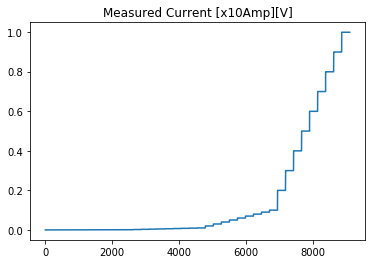

In [38]:
plt.plot(current_volt)
plt.title("Measured Current [x10Amp][V]")
plt.savefig("C:\\data\\measured_current.png")

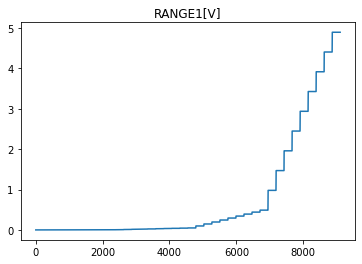

In [39]:
plt.plot(range1)
plt.title("RANGE1[V]")
plt.savefig("C:\\data\\range1.png")

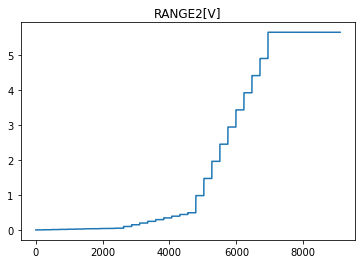

In [40]:
plt.plot(range2)
plt.title("RANGE2[V]")
plt.savefig("C:\\data\\range2.png")

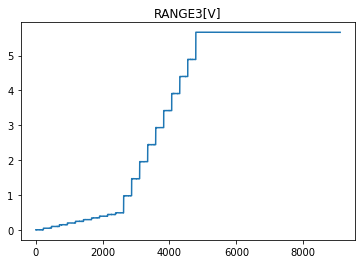

In [41]:
plt.plot(range3)
plt.title("RANGE3[V]")
plt.savefig("C:\\data\\range3.png")

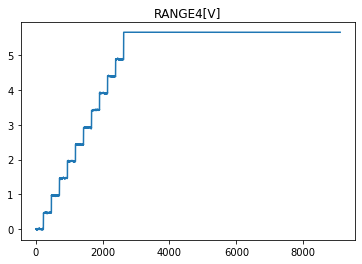

In [42]:
plt.plot(range4)
plt.title("RANGE4[V]")
plt.savefig("C:\\data\\range4.png")

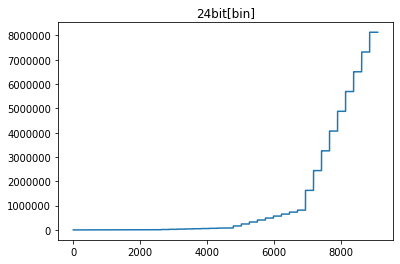

In [43]:
plt.plot(adc24bit)
plt.title("24bit[bin]")
plt.savefig("C:\\data\\adc.png")

In [18]:
filter1 = data["step"] == 1
filtered_data = data[filter1]
filtered_data

,time,step,current[mA],real_currentx10[V],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin]
0,21:43:14,1,0.0,-4.169924e-06,-0.001079,-0.001410,-0.003906,-0.005510,821
1,21:43:19,1,0.0,-4.860105e-06,-0.001073,-0.001642,-0.004410,-0.010814,825
2,21:43:24,1,0.0,1.227938e-05,-0.001073,-0.001466,-0.004775,-0.021122,801
3,21:43:29,1,0.0,1.118660e-05,-0.001083,-0.001465,-0.004079,-0.009839,821
4,21:43:34,1,0.0,7.763744e-07,-0.001072,-0.001586,-0.003782,-0.016433,804
...,...,...,...,...,...,...,...,...,...
222,22:01:44,1,0.0,1.811643e-06,-0.001075,-0.001492,-0.003749,-0.013370,827
223,22:01:49,1,0.0,3.767157e-06,-0.001068,-0.001480,-0.005197,-0.015266,809
224,22:01:54,1,0.0,4.629882e-06,-0.001080,-0.001538,-0.005844,-0.025490,814
225,22:01:59,1,0.0,1.984189e-06,-0.001079,-0.001484,-0.004077,-0.015566,805


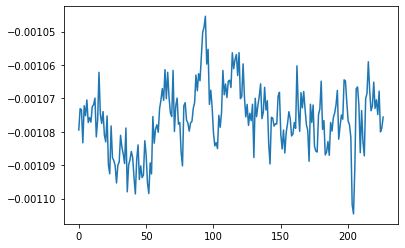

In [19]:
plt.plot(filtered_data["RANGE1[V]"])
plt.show()

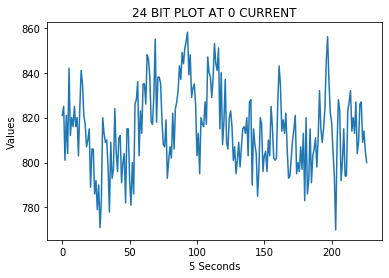

In [20]:
plt.plot(filtered_data["24bit[bin]"])
plt.ylabel("Values")
plt.xlabel("5 Seconds")
plt.title("24 BIT PLOT AT 0 CURRENT")
plt.savefig("C:\\data\\24bit_offset.png")

In [21]:
range1_offset = 0
add = 0
for range1 in filtered_data["RANGE1[V]"]:
    add += float(range1)
range1_offset = add / len(filtered_data["RANGE1[V]"])
range1_line = "RANGE1 offset is " + str(range1_offset) + "\n"
range1_offset

-0.0010761426531718063

In [22]:
range2_offset = 0
add = 0
for range2 in filtered_data["RANGE2[V]"]:
    add += float(range2)
range2_offset = add / len(filtered_data["RANGE2[V]"])
range2_line = "RANGE2 offset is " + str(range2_offset) + "\n"
range2_offset

-0.0015303748253744497

In [23]:
range3_offset = 0
add = 0
for range3 in filtered_data["RANGE3[V]"]:
    add += float(range3)
range3_offset = add / len(filtered_data["RANGE3[V]"])
range3_line = "RANGE3 offset is " + str(range3_offset) + "\n"
range3_offset

-0.004095304421629957

In [24]:
range4_offset = 0
add = 0
for range4 in filtered_data["RANGE4[V]"]:
    add += float(range4)
range4_offset = add / len(filtered_data["RANGE4[V]"])
range4_line = "RANGE4 offset is " + str(range4_offset) + "\n"
range4_offset

-0.01320253737703171

In [25]:
real_current_offset = 0
add = 0
for current in filtered_data["real_currentx10[V]"]:
    add += float(current)
real_current_offset = add / len(filtered_data["real_currentx10[V]"])
current_line = "Measured current offset is " + str(real_current_offset) + "\n"
real_current_offset

3.7542358297806178e-06

In [26]:
adc_offset = 0
add = 0
for bins in filtered_data["24bit[bin]"]:
    add += float(bins)
adc_offset = add / len(filtered_data["24bit[bin]"])
adc_line = "24 Bit ADC offset is " + str(adc_offset) + "\n"
adc_offset

814.7797356828194

In [27]:
lines = [range1_line, range2_line, range3_line, range4_line, current_line, adc_line]
f = open("C:\\data\\offsets.txt", "w")
f.writelines(lines)
f.close()

In [28]:
data["RANGE1[V]"] = [currents - range1_offset for currents in data["RANGE1[V]"]]
data["RANGE2[V]"] = [currents - range2_offset for currents in data["RANGE2[V]"]]
data["RANGE3[V]"] = [currents - range3_offset for currents in data["RANGE3[V]"]]
data["RANGE4[V]"] = [currents - range4_offset for currents in data["RANGE4[V]"]]
data["24bit[bin]"] = [int(currents - adc_offset) for currents in data["24bit[bin]"]]

In [29]:
filtered_data2 = data[filter1]
filtered_data2

,time,step,current[mA],real_currentx10[V],RANGE1[V],RANGE2[V],RANGE3[V],RANGE4[V],24bit[bin]
0,21:43:14,1,0.0,-4.169924e-06,-3.327927e-06,0.000121,0.000190,0.007692,6
1,21:43:19,1,0.0,-4.860105e-06,3.056233e-06,-0.000111,-0.000315,0.002388,10
2,21:43:24,1,0.0,1.227938e-05,2.711063e-06,0.000064,-0.000680,-0.007919,-13
3,21:43:29,1,0.0,1.118660e-05,-7.181697e-06,0.000065,0.000017,0.003363,6
4,21:43:34,1,0.0,7.763744e-07,3.918703e-06,-0.000056,0.000313,-0.003231,-10
...,...,...,...,...,...,...,...,...,...
222,22:01:44,1,0.0,1.811643e-06,1.273013e-06,0.000039,0.000347,-0.000168,12
223,22:01:49,1,0.0,3.767157e-06,8.289933e-06,0.000050,-0.001102,-0.002063,-5
224,22:01:54,1,0.0,4.629882e-06,-3.903337e-06,-0.000008,-0.001749,-0.012287,0
225,22:01:59,1,0.0,1.984189e-06,-2.753037e-06,0.000046,0.000019,-0.002363,-9


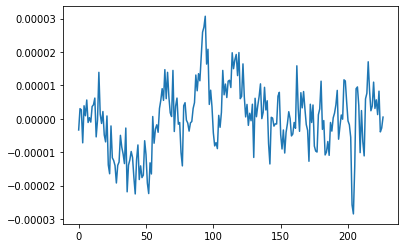

In [30]:
plt.plot(filtered_data2["RANGE1[V]"])
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                9107 non-null   object 
 1   step                9107 non-null   int64  
 2   current[mA]         9107 non-null   float64
 3   real_currentx10[V]  9107 non-null   float64
 4   RANGE1[V]           9107 non-null   float64
 5   RANGE2[V]           9107 non-null   float64
 6   RANGE3[V]           9107 non-null   float64
 7   RANGE4[V]           9107 non-null   float64
 8   24bit[bin]          9107 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 640.5+ KB


In [33]:
data.to_csv ('C:\\data\\offset_correction_data.csv', index = False, header = True)